# Timeseries of eddy diffusivity

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmocean as cmo
import seaborn as sns
sns.set_style('darkgrid')

In [7]:
time = np.arange(0,400.1,0.5)

# integral of cross-stream velocity autocovariance (Lagrangian / Eulerian)
def loadDiffAcov(slope,layer,field,filter='_highqfilter'):
    file = '../../Results/Results_Diffusivities/SmallLd/lagrangian/acov_diff_s'+slope+'_layer'+layer+'_field'+field+'_1hr12hr_biased'+filter+'.csv'
    diff_acov = pd.read_csv(file)
    return diff_acov

def plotDiff(ax,slope,layer,filter='_highqfilter'):
    diff1 = loadDiffAcov(slope,layer,'1',filter=filter)
    diff2 = loadDiffAcov(slope,layer,'2',filter=filter)
    diff3 = loadDiffAcov(slope,layer,'3',filter=filter)
    diff = pd.concat([diff1,diff2,diff3],axis=0)
    for i in range(30):
        ax.plot(time,diff.iloc[i,:],color='k',alpha=0.2)
    ax.plot(time,diff.mean(axis=0),color='r',linewidth=3)

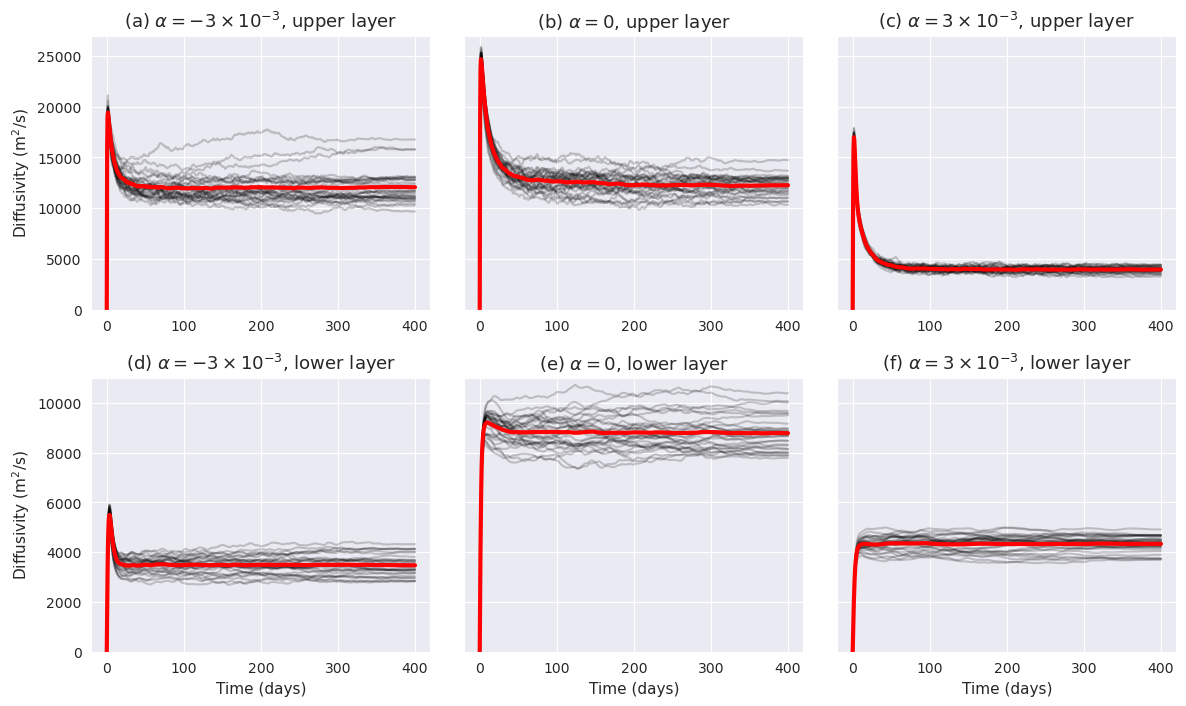

In [8]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(14,8),sharey='row')

plotDiff(ax1,'-3e-3','1')
plotDiff(ax2,'0','1')
plotDiff(ax3,'3e-3','1')

plotDiff(ax4,'-3e-3','2')
plotDiff(ax5,'0','2')
plotDiff(ax6,'3e-3','2')
    
ax1.set_ylabel(r'Diffusivity (m$^2$/s)',fontsize=11)
ax4.set_ylabel(r'Diffusivity (m$^2$/s)',fontsize=11)

for ax in [ax1,ax2,ax3]:
    ax.set_ylim(0, 27000)
for ax in [ax4,ax5,ax6]:
    ax.set_ylim(0, 11000)
    ax.set_xlabel('Time (days)',fontsize=11)

ax1.set_title(r'(a) $\alpha=-3\times 10^{-3}$, upper layer',fontsize=13)
ax2.set_title(r'(b) $\alpha=0$, upper layer',fontsize=13)
ax3.set_title(r'(c) $\alpha=3\times 10^{-3}$, upper layer',fontsize=13)
ax4.set_title(r'(d) $\alpha=-3\times 10^{-3}$, lower layer',fontsize=13)
ax5.set_title(r'(e) $\alpha=0$, lower layer',fontsize=13)
ax6.set_title(r'(f) $\alpha=3\times 10^{-3}$, lower layer',fontsize=13)
plt.subplots_adjust(hspace=0.25,wspace=0.1)

#plt.savefig('../../Figures/diff_timeseries.pdf',bbox_inches='tight')
plt.show()

## Check effect of filtering trapped particles over steep negative slopes

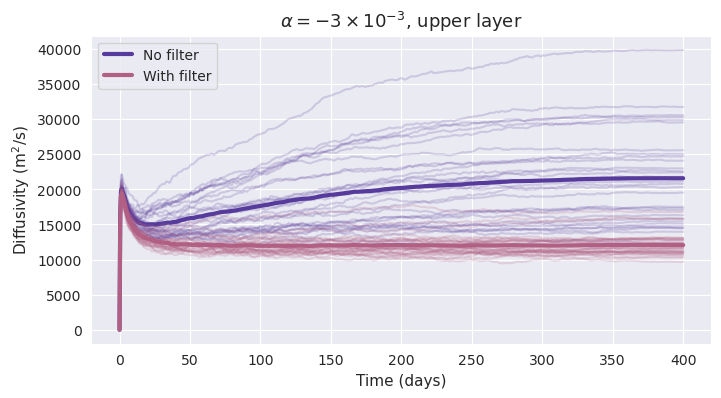

In [ ]:
cmap = matplotlib.colormaps.get_cmap('cmo.thermal')
colors = cmap(np.linspace(0.25,0.75,3))

def plotDiff(ax,slope,layer,color,label,filter='_highqfilter'):
    diff1 = loadDiffAcov(slope,layer,'1',filter=filter)
    diff2 = loadDiffAcov(slope,layer,'2',filter=filter)
    diff3 = loadDiffAcov(slope,layer,'3',filter=filter)
    diff = pd.concat([diff1,diff2,diff3],axis=0)
    for i in range(30):
        ax.plot(time,diff.iloc[i,:],color=color,alpha=0.2)
    ax.plot(time,diff.mean(axis=0),color=color,linewidth=3,label=label)

fig, ax = plt.subplots(1,1,figsize=(8,4))

plotDiff(ax,'-3e-3','1',colors[0],'No filter',filter='')
plotDiff(ax,'-3e-3','1',colors[1],'With filter',filter='_highqfilter')

ax.legend()
ax.set_ylabel(r'Diffusivity (m$^2$/s)',fontsize=11)
ax.set_xlabel('Time (days)',fontsize=11)

ax.set_title(r'$\alpha=-3\times 10^{-3}$, upper layer',fontsize=13)

#plt.savefig('../../Figures/diff_timeseries_filter.pdf',bbox_inches='tight')
plt.show()